## This is initialization code.

In [12]:
%matplotlib inline

import gc
import os
# Force matplotlib to not use any Xwindows backend.
os.environ['MPLBACKEND'] = 'agg'

import subprocess

# import tables

import itertools

import pandas as pd
import numpy as np
import pylab
import re


import scipy.stats as stats
import scipy

# load statsmodels as alias ``sm``
import statsmodels.api as sm


import matplotlib

#matplotlib.use('Agg')


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib.backends.backend_svg import SVG
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import ScalarFormatter

In [13]:
print("get here ipython...")

get here ipython...


In [14]:
last_gene_row=63678
last_ercc_row=63770

project_root = "/gs/project/wst-164-ab/share/expr/a026-x056-1876-e12"
exper_name = "a026-E12"
datasets = {"gene": ["matr/all.readcnt.known.genes.csv", 0, last_gene_row-1],
            "ercc": ["matr/all.readcnt.known.genes.csv", last_gene_row-1, last_ercc_row-1]}

In [15]:
first_sc_col=15
last_sc_col=88
run_datasets = [
    ["ercc-egfrn", "ercc", "ERCC single-cell correlation to E12 1876 PDX EGFR negative",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [5-1, 6-1], "Kernel Density"],
    ["gene-egfrn", "gene", "Gene single-cell correlation to E12 1876 PDX EGFR negative",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [5-1, 6-1], "Kernel Density"],
    ["ercc-egfrp", "ercc", "ERCC single-cell correlation to E12 1876 PDX EGFR positive",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [7-1, 8-1], "Kernel Density"],
    ["gene-egfrp", "gene", "Gene single-cell correlation to E12 1876 PDX EGFR positive",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [7-1, 8-1], "Kernel Density"],
    ["ercc-tc1000", "ercc", "ERCC single-cell correlation to E12 1876 PDX TC_1000",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [9-1, 10-1], "Kernel Density"],
    ["gene-tc1000", "gene", "Gene single-cell correlation to E12 1876 PDX TC_1000",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [9-1, 10-1], "Kernel Density"],
    ["ercc-tc200", "ercc", "ERCC single-cell correlation to E12 1876 PDX TC_200",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [11-1, 12-1], "Kernel Density"],
    ["gene-tc200", "gene", "Gene single-cell correlation to E12 1876 PDX TC_200",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [11-1, 12-1], "Kernel Density"],
    ["ercc-tcrneasy", "ercc", "ERCC single-cell correlation to E12 1876 PDX TC_RNeasy",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [13-1, 14-1], "Kernel Density"],
    ["gene-tcrneasy", "gene", "Gene single-cell correlation to E12 1876 PDX TC_RNeasy",  range(first_sc_col-1, last_sc_col), "Pearson correlation", [13-1, 14-1], "Kernel Density"],
                     ]


In [16]:
global y_cols_df
global x_cols_df
global y_cols_avg
global x_cols_avg
global y_cols_arr
global x_cols_arr
global edf
global edf2
global x_col_range
global y_col_range
global x_title
global y_title

In [17]:
def mylogavg(a):
    """Average first and last element of a 1-D array"""
    # return (a[0] + a[-1]) * 0.5
    return np.log2(np.average(a+1))

In [18]:
# https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    # kde = stats.gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    kde = stats.gaussian_kde(x, bw_method=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [19]:
def read_expr(file):

    print("file: ", file)
    expr = pd.read_csv(file, sep=',', header=0
                                 # index_col=[0]
                                 # usecols=[0, 1],
                                 # names=["transcript_id", "ex"]
                          )
    # filter zeros
    # expr = expr.query('ex != 0.0')
    # print("expr: \n", expr.iloc[:,0:3])
    return expr

In [20]:
def extract_dataset(dtst_name):
    global y_cols_df
    global x_cols_df
    global y_cols_avg
    global x_cols_avg
    global y_cols_arr
    global x_cols_arr
    global edf
    global edf2
    global x_col_range
    global y_col_range
    global x_title
    global y_title
    # extract dataset information
    dtst_file, dtst_min_row, dtst_max_row = datasets[dtst_name]
    
    edf = read_expr(os.path.join(project_root, dtst_file))
    print("edf.shape: ", edf.shape)
    
    edf2 = edf.query(r"""index >= %s & index <%s""" % (dtst_min_row, dtst_max_row))
    edf2_len = edf2.shape[0]
    #print(edf2.head(3))

In [21]:
def prepare_fig2b2():
    global fig2b_serie
    global x_col_range
    global edf2
    
    fig2b_serie = np.empty(shape=0)
    for i in x_col_range:
        for j in y_col_range:
            #print("i, j: ", i, j)
            i_cols_arr = edf2.iloc[:, i].values
            j_cols_arr = edf2.iloc[:, j].values
            #print("i_cols_arr: \n", i_cols_arr)
            #print("j_cols_arr: \n", j_cols_arr)
            pearsonr = stats.pearsonr(i_cols_arr, j_cols_arr)[0]
            fig2b_serie = np.append(fig2b_serie, [pearsonr])
    #print("fig2b_serie: ", fig2b_serie)

In [22]:
def plot_fig_2b2():
    global fig2b_serie
    global x_title
    global y_title
    global anal_name
    
    # The grid we'll use for plotting
    x_grid = np.linspace(0, 1.1, 1000)

    # Plot the three kernel density estimates
    # fig, ax = plt.subplots(1, 4, sharey=True,
    #                        figsize=(13, 3))
    # fig.subplots_adjust(wspace=0)


    pdf = kde_scipy(fig2b_serie, x_grid) #,, bandwidth=0.2
    
    fig = plt.figure()
    # plt.set_dpi(100)
    # fig.subplots_adjust(bottom=0.1)
    ax = fig.add_subplot(111)
    ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=1)
    # ax[i].fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
    ax.set_title("kde_scipy")
    ax.set_xlim(0, 1.1)

    plt.title(fig_title,  fontsize= 10)
    plt.subplots_adjust(top=0.95, bottom=0.10, left=0.12, right=0.95, hspace = 0.1, wspace = 0.2)
    # plt.tight_layout()

    fig.set_size_inches(5, 5)


    ax.set_xlabel(x_title, fontsize= 8)
    ax.set_ylabel(y_title, fontsize= 8)

    # axis
    ax.get_xaxis().set_tick_params(direction='in')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.tick_params(which='both', width=1)
    plt.tick_params(which='major', length=10)
    plt.tick_params(which='minor', length=4, color='gray')
    ax.yaxis.set_tick_params(direction='in')
    ax.yaxis.set_tick_params(which='both', width=1)
    ax.yaxis.set_tick_params(which='major', length=10)
    ax.get_yaxis().set_tick_params(which='minor', length=4, color='gray')

    plt.savefig("../sc_qc/figs/%s-fig2b2-%s.png" % (exper_name, anal_name), format="pdf")  # saves the current figure into a pdf page
    #plt.savefig("../figs/fig2a-%s.png" % anal_name, format="png", dpi=400)  # saves the current figure into a pdf page
    
    plt.show()
    plt.close()

In [23]:
def main_fig2b2():
    # load_one_module('gcc/4.8.2')
    global anal_name
    global y_cols_df
    global x_cols_df
    global y_cols_avg
    global x_cols_avg
    global y_cols_arr
    global x_cols_arr
    global edf
    global edf2
    global mylogavg
    global x_col_range
    global y_col_range
    global fig_title
    global x_title
    global y_title
    for run_dtst in run_datasets:
        anal_name, dtst_name, fig_title, \
        x_col_range, x_title, y_col_range, y_title = run_dtst
        extract_dataset(dtst_name)
        prepare_fig2b2()
        plot_fig_2b2()

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


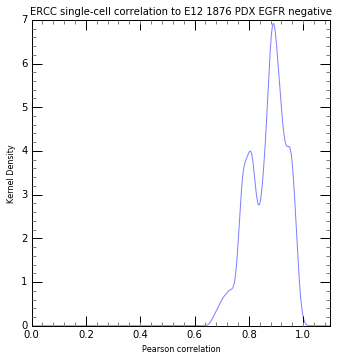

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


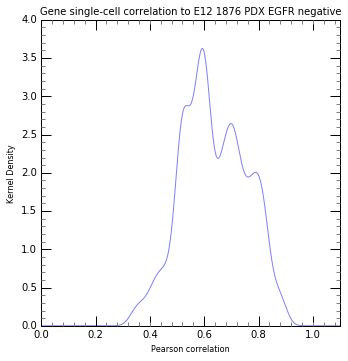

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


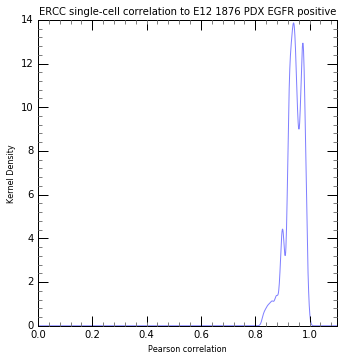

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


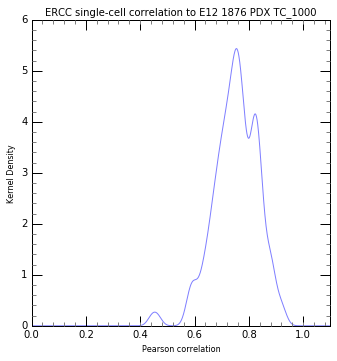

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


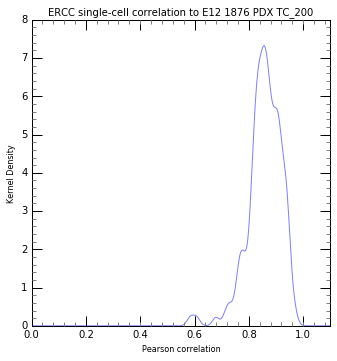

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


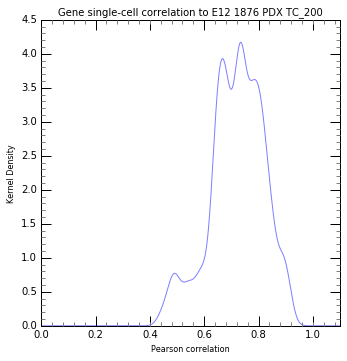

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


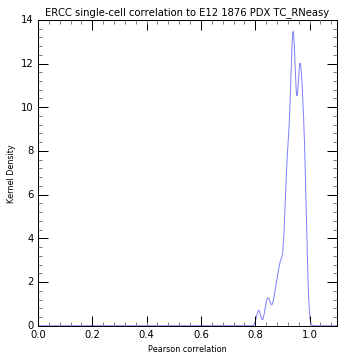

file:  /gs/project/wst-164-ab/share/expr/a026-x056-1876-e12/matr/all.readcnt.known.genes.csv
edf.shape:  (63772, 88)


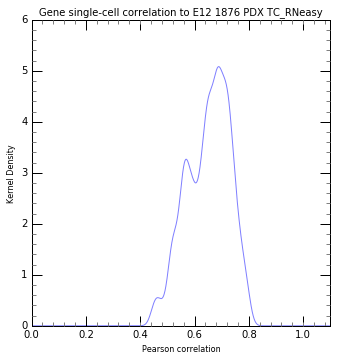

done...


In [24]:
main_fig2b2()
print("done...")